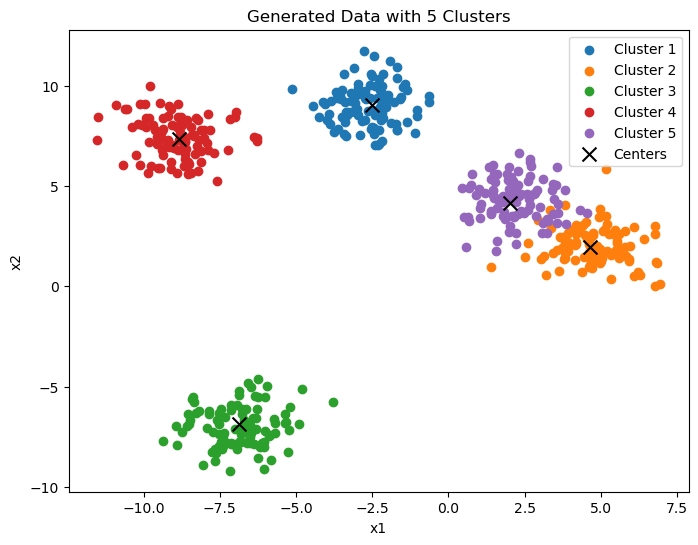

In [ ]:
# generate K cluster for learning
import numpy as np
import matplotlib.pyplot as plt

K = 5
points_per_cluster = 100
np.random.seed(42)

centers = np.random.uniform(-10, 10, size=(K,2))

# Generate points around each center
X = []
y = []

for i, center in enumerate(centers):
    cluster_points = center + np.random.randn(points_per_cluster, 2)
    X.append(cluster_points)
    y += [i] * points_per_cluster

X = np.vstack(X)
y = np.array(y)

# Visualize
plt.figure(figsize=(8, 6))
for i in range(K):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title("Generated Data with 5 Clusters")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [27]:
# Initialize centroids randomly from data points
centroids = X[np.random.choice(len(X), K, replace=False)]
for iteration in range(10):  # Run for a fixed number of iterations or until convergence
    labels = []
    for x in X:
        distances = [np.linalg.norm(x - c) for c in centroids]
        #print(distances)
        labels.append(np.argmin(distances))
    labels = np.array(labels)
    # Update centroids
    for i in range(K):
        if np.any(labels == i):
            centroids[i] = X[labels == i].mean(axis=0)

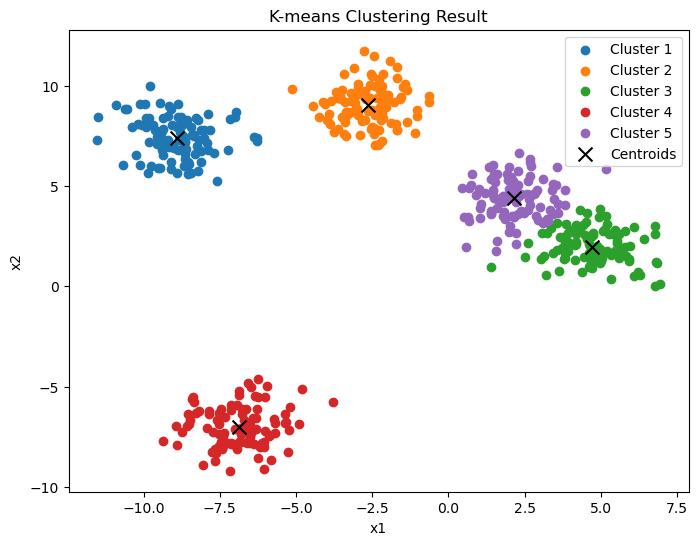

In [28]:
# Visualize K-means clustering result
plt.figure(figsize=(8, 6))
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title("K-means Clustering Result")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()